<a href="https://colab.research.google.com/github/DIPANJAN001/Andrew-Ng-Machine-Learning-Notes/blob/master/TitanicSurvivalPredictionusingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [433]:
import seaborn as sns

In [434]:
titanic_data=sns.load_dataset('titanic')

In [435]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [436]:

titanic_data.shape

(891, 15)

In [437]:

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [438]:

titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Handling the Missing values

In [439]:

titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)

In [440]:

titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

In [441]:

titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data Analysis

In [442]:

titanic_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [443]:

titanic_data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

Encoding the Categorical Columns

In [444]:
titanic_data['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [445]:
titanic_data['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [446]:


titanic_data.replace({'sex':{'male':0,'female':1}, 'embarked':{'S':0,'C':1,'Q':2},'class':{'First':0,'Second':1,'Third':2},'who':{'man':0,'woman':1,'child':2}}, inplace=True)

In [447]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,2,0,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,1,0,1,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0,2,1,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0,0,1,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,0,2,0,True,NaN,Southampton,no,True


Separating features & Target

In [448]:
X = titanic_data.drop(columns = ['survived','deck','embark_town','alive','adult_male','alone'],axis=1)
Y = titanic_data['survived']

In [449]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who
0,3,0,22.000000,1,0,7.2500,0,2,0
1,1,1,38.000000,1,0,71.2833,1,0,1
2,3,1,26.000000,0,0,7.9250,0,2,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,3,0,35.000000,0,0,8.0500,0,2,0
...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,1,0
887,1,1,19.000000,0,0,30.0000,0,0,1
888,3,1,29.699118,1,2,23.4500,0,2,1
889,1,0,26.000000,0,0,30.0000,1,0,0


Splitting the data into training data & Test data

In [450]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.12, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=1)

In [451]:
X_train=np.asarray(X_train).astype(np.float32)

In [452]:
Y_train=np.asarray(Y_train).astype(np.float32)

In [453]:
import keras
from keras import  Model,Input
from keras.layers import Dense

In [454]:
inp=Input(shape=(X_train.shape[1],))
l1=Dense(16,activation='relu')(inp)
l3=Dense(4,activation='relu')(l1)
out=Dense(1,activation='sigmoid')(l3)
model=Model(inputs=inp,outputs=out)

In [455]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [456]:
history=model.fit(X_train,y_train,epochs=120,validation_data=(X_val, y_val),shuffle=True)

Epoch 1/120
23/23 [==============================] - 1s 18ms/step - loss: 1.0930 - accuracy: 0.6652 - val_loss: 0.7962 - val_accuracy: 0.7215
Epoch 2/120
23/23 [==============================] - 0s 7ms/step - loss: 0.7071 - accuracy: 0.6241 - val_loss: 0.6813 - val_accuracy: 0.6709
Epoch 3/120
23/23 [==============================] - 0s 7ms/step - loss: 0.6840 - accuracy: 0.6199 - val_loss: 0.6774 - val_accuracy: 0.6709
Epoch 4/120
23/23 [==============================] - 0s 6ms/step - loss: 0.6817 - accuracy: 0.6184 - val_loss: 0.6739 - val_accuracy: 0.6709
Epoch 5/120
23/23 [==============================] - 0s 6ms/step - loss: 0.6795 - accuracy: 0.6184 - val_loss: 0.6720 - val_accuracy: 0.6709
Epoch 6/120
23/23 [==============================] - 0s 6ms/step - loss: 0.6784 - accuracy: 0.6184 - val_loss: 0.6690 - val_accuracy: 0.6709
Epoch 7/120
23/23 [==============================] - 0s 5ms/step - loss: 0.6767 - accuracy: 0.6184 - val_loss: 0.6662 - val_accuracy: 0.6709
Epoch 8/120


In [457]:
test_loss, test_acc = model.evaluate(np.array(X_test), Y_test)
print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.6355
Test accuracy: 0.6355140209197998


In [458]:
import matplotlib.pyplot as plt

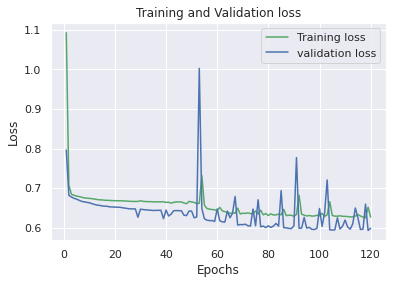

In [459]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,121)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
